In [1]:
import arviz as az
import numpy as np 
import pymc as pm
import scipy.stats as stats 

In [2]:
seed = 2025
rng = np.random.default_rng(seed)

Y = stats.bernoulli(0.7).rvs(20, random_state=rng)
Y

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [3]:
with pm.Model() as model: 
    theta = pm.Beta("theta", alpha=1, beta=1)
    y_obs = pm.Binomial("y_obs", n=1, p=theta, observed=Y)
    idata = pm.sample(1000, return_inferencedata=True)

    idata.to_netcdf("my_model_samples.nc")


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
/usr/local/lib/python3.12/dist-packages/sqlalchemy/orm/query.py:195: SyntaxWarning: "is not" with 'tuple' literal. Did you mean "!="?
  if entities is not ():
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [4]:
idata = az.from_netcdf("my_model_samples.nc")

In [5]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [6]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.681,0.097,0.506,0.86,0.003,0.002,840.0,1482.0,1.0


In [7]:
a=az.ess(idata, var_names=['theta'])
type(a)

xarray.core.dataset.Dataset

In [8]:
a.values()

ValuesView(<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    theta    float64 8B 840.0)

<Axes: title={'center': 'theta'}, xlabel='Quantile', ylabel='ESS for small intervals'>

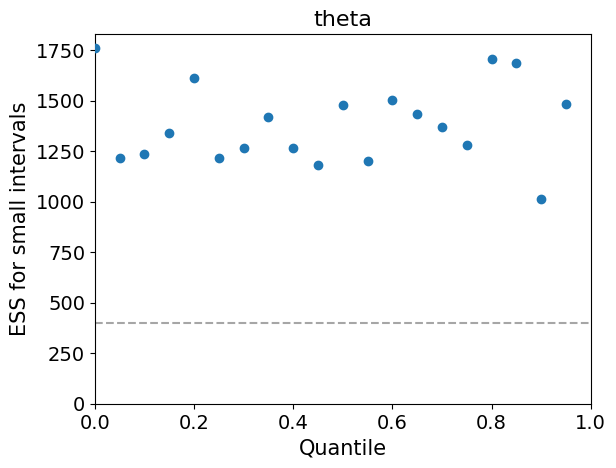

In [9]:
az.plot_ess(idata)

<Axes: title={'center': 'theta'}>

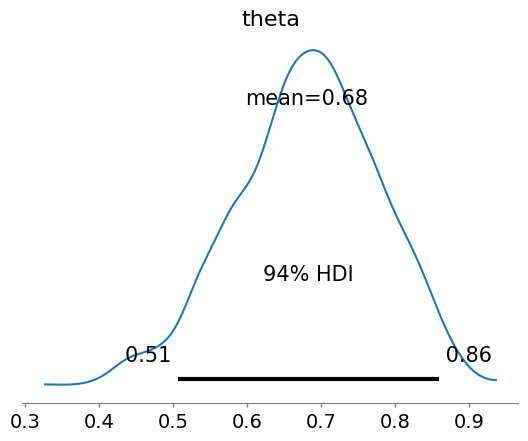

In [10]:
az.plot_posterior(idata)

In [11]:
az.rhat(idata).values()

ValuesView(<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    theta    float64 8B 1.0)

array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

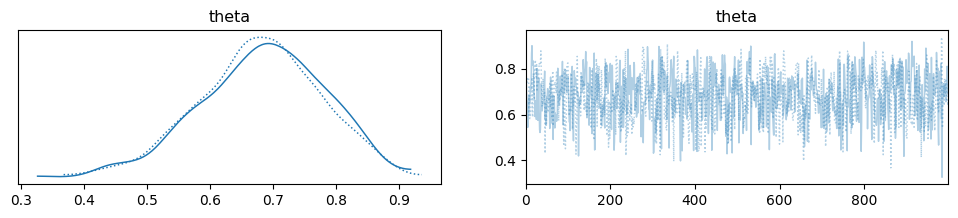

In [12]:
az.plot_trace(idata)

array([<Axes: title={'center': 'theta\n0'}>,
       <Axes: title={'center': 'theta\n1'}>], dtype=object)

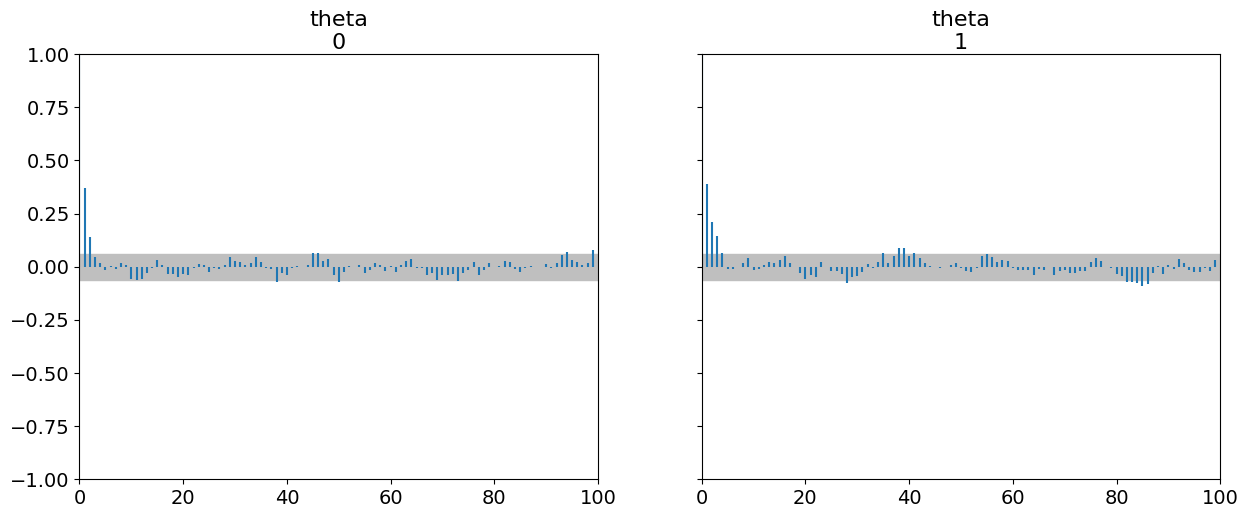

In [13]:
az.plot_autocorr(idata)

<Axes: title={'center': 'theta'}, xlabel='Rank (all chains)', ylabel='Chain'>

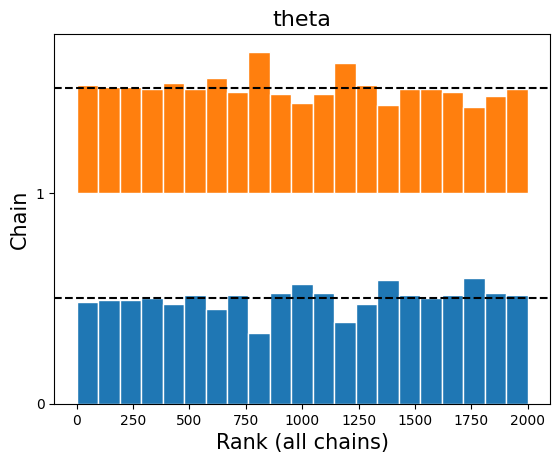

In [14]:
az.plot_rank(idata)